In [ ]:
import pandas as pd
import re
from collections import Counter
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

def extract_domain(url):
    # Extract the domain name from a URL
    match = re.search(r'www\.([A-Za-z0-9-]+)\.', url)
    if match:
        return match.group(1)
    return None

def remove_urls_and_extract_domains(text, domain_list):
    # Find all URLs in the text
    urls = re.findall(r'https?://\S+|www\.\S+', text)
    # Extract domain names and add them to the domain_list
    for url in urls:
        domain = extract_domain(url)
        if domain:
            domain_list.append(domain)
    # Remove URLs from the text
    return re.sub(r'https?://\S+|www\.\S+', '', text)

# Read your CSV file
df = pd.read_csv('abusiverelation_domesticviolence_comments.csv')

# Initialize empty domain list
domain_list = []

# Apply the function to the 'body' column (or whatever your text column is named)
df['comment_body'] = df['comment_body'].apply(lambda x: remove_urls_and_extract_domains(x, domain_list))

# Print results
print("Total number of domains found:", len(domain_list), "\n")
domain_counts = Counter(domain_list)
print("Domain frequency counts:", domain_counts, "\n")

# Optionally save the processed DataFrame
df.to_csv('processed_comments.csv', index=False)

Total number of domains found: 3036 

Domain frequency counts: Counter({'thehotline': 975, 'loveisrespect': 961, 'hotpeachpages': 954, 'reddit': 37, 'youtube': 9, 'strangulationtraininginstitute': 8, 'domesticshelters': 6, 'psychologytoday': 5, 'flourishinghope': 5, 'jw': 4, 'confusiontoclaritynow': 3, 'wthr': 3, 'womenslaw': 2, 'gov': 2, 'cdc': 2, 'audible': 2, 'womensaid': 2, 'docdroid': 2, 'bwss': 1, 'libertylane': 1, 'mountsinai': 1, 'sbs': 1, 'theduluthmodel': 1, 'changing-lives': 1, 'nhs': 1, 'sos': 1, 'fcc': 1, 'pcadv': 1, 'mwl-law': 1, 'familyjusticecenter': 1, 'davideclarkephd': 1, 'hilfetelefon': 1, 'facebook': 1, 'instagram': 1, 'flexjobs': 1, 'goodrx': 1, 'king5': 1, 'helpguide': 1, 'nationaldahelpline': 1, 'ncdv': 1, 'breakthecycle': 1, 'justice': 1, 'discovermagazine': 1, 'ivsha': 1, 'optery': 1, 'minuteinbox': 1, 'tn': 1, 'ssa': 1, 'btr': 1, 'selfloverainbow': 1, 'healthline': 1, 'avonhealthcare': 1, 'kob': 1, 'njcourts': 1, 'safefjc': 1, 'betterhelp': 1, 'aclu': 1, 'goo

In [ ]:
sorted_items = list(sorted(domain_counts.items(), key=lambda item: item[1], reverse=True))

top_domains = sorted_items[:20]
top_domains

[('thehotline', 975),
 ('loveisrespect', 961),
 ('hotpeachpages', 954),
 ('reddit', 37),
 ('youtube', 9),
 ('strangulationtraininginstitute', 8),
 ('domesticshelters', 6),
 ('psychologytoday', 5),
 ('flourishinghope', 5),
 ('jw', 4),
 ('confusiontoclaritynow', 3),
 ('wthr', 3),
 ('womenslaw', 2),
 ('gov', 2),
 ('cdc', 2),
 ('audible', 2),
 ('womensaid', 2),
 ('docdroid', 2),
 ('bwss', 1),
 ('libertylane', 1)]

In [ ]:
# Part 2: Text Cleaning
#removing all symbols
pattern = r'[^\w\s,.?!;:\'\"-]'
df['comment_body'] = df['comment_body'].str.replace(pattern, '', regex=True)

filtered_df = df[df['comment_body'].apply(lambda x: len(str(x)) <= 1)]
count = len(filtered_df)

#removing rows where comments have one single word
df = df[df['comment_body'].apply(lambda x: len(str(x)) > 1)]

count_deleted = len(df[df['comment_author'] == '[deleted]'])
print("Number of deleted authors:", count_deleted)


Number of deleted authors: 521


In [ ]:
# Part 4: Bigram Analysis
def get_top_bigrams(text_data, num_bigrams=20):
    # Clean data first
    clean_text = text_data['comment_body'].dropna().astype(str).tolist()

    # Create bigram vectorizer
    cv = CountVectorizer(ngram_range=(2, 2), stop_words='english')

    # Get bigram frequencies
    bigrams = cv.fit_transform(clean_text)
    bigram_counts = bigrams.sum(axis=0)

    # Create list of bigrams with their counts
    bigram_freq = [(bigram, bigram_counts[0, idx])
                   for bigram, idx in cv.vocabulary_.items()]

    # Sort by frequency and get top n
    top_bigrams = sorted(bigram_freq,
                        key=lambda x: x[1],
                        reverse=True)[:num_bigrams]

    # Print results
    print("\nTop", num_bigrams, "bigrams:")
    for bigram, count in top_bigrams:
        print(f"{bigram}: {int(count)}")

    return top_bigrams

# Use the function
top_bigrams = get_top_bigrams(df, 20)


Top 20 bigrams:
love respect: 992
victim blaming: 988
support groups: 987
forms abuse: 967
abuse love: 967
safety planning: 965
sexual violence: 964
thank posting: 961
resources support: 960
different forms: 956
domestic sexual: 956
contact moderators: 956
looking resources: 956
bot action: 955
action performed: 955
performed automatically: 955
automatically contact: 955
moderators subreddit: 955
subreddit message: 955
message compose: 955


In [ ]:
def get_top_trigrams(text_data, num_trigrams=20):
    # Clean data first
    clean_text = text_data['comment_body'].dropna().astype(str).tolist()

    # Create trigram vectorizer (ngram_range=(3,3) for trigrams)
    cv = CountVectorizer(ngram_range=(3, 3), stop_words='english')

    # Get trigram frequencies
    trigrams = cv.fit_transform(clean_text)
    trigram_counts = trigrams.sum(axis=0)

    # Create list of trigrams with their counts
    trigram_freq = [(trigram, trigram_counts[0, idx])
                    for trigram, idx in cv.vocabulary_.items()]

    # Sort by frequency and get top n
    top_trigrams = sorted(trigram_freq,
                         key=lambda x: x[1],
                         reverse=True)[:num_trigrams]

    # Print results
    print("\nTop", num_trigrams, "trigrams:")
    for trigram, count in top_trigrams:
        print(f"{trigram}: {int(count)}")

    return top_trigrams

# Use the function
top_trigrams = get_top_trigrams(df, 20)


Top 20 trigrams:
domestic sexual violence: 956
abuse love respect: 956
different forms abuse: 955
bot action performed: 955
action performed automatically: 955
performed automatically contact: 955
automatically contact moderators: 955
contact moderators subreddit: 955
moderators subreddit message: 955
subreddit message compose: 955
tolerate victim blaming: 955
thank posting abusiverelationships: 954
posting abusiverelationships support: 954
abusiverelationships support looking: 954
support looking resources: 954
looking resources support: 954
resources support groups: 954
support groups helplines: 954
groups helplines sidebar: 954
helplines sidebar wiki: 954


In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('omw-1.4')

# Read CSV
df = pd.read_csv('abusiverelation_domesticviolence_comments.csv')

def clean_text(text):
   # Remove HTML tags
   text = re.sub(r'<.*?>', '', text)
   # Remove non-alphanumeric characters
   text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
   # Convert to lowercase
   tokens = nltk.word_tokenize(text.lower())
   # Filter out non-alphanumeric tokens
   tokens = [token for token in tokens if token.isalpha()]
   # Remove stopwords
   stop_words = set(stopwords.words('english'))
   filtered_tokens = [token for token in tokens if token not in stop_words]
   # Lemmatization
   lemmatizer = WordNetLemmatizer()
   lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
   # Join back into a single string
   return ' '.join(lemmatized_tokens)

df['comment_body'] = df['comment_body'].apply(clean_text)

# Save cleaned data
df.to_csv('abusiverelation_domesticviolence_comments_cleaned.csv', index=False, encoding='utf-8')
df.head()

[nltk_data] Downloading package punkt to C:\Users\Hp 840
[nltk_data]     g3/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Hp 840
[nltk_data]     g3/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Hp 840
[nltk_data]     g3/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Hp 840
[nltk_data]     g3/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Hp 840
[nltk_data]     g3/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,subreddit,post_id,post_title,post_author,post_score,post_created_utc,post_permalink,comment_id,comment_author,comment_body,comment_score,comment_created_utc,comment_permalink
0,domesticviolence,1hucfql,When love hurts..I don’t know what to do,RA002112,2,2025-01-05 17:41:28,https://www.reddit.com/r/domesticviolence/comm...,m5jxpjs,Winter_Apartment_376,op nothing lied give slightest reason even fel...,1,2025-01-05 17:49:35,https://www.reddit.com/r/domesticviolence/comm...
1,domesticviolence,1hubhke,Feeling helpless as family support,littlesttiniestbear,1,2025-01-05 17:00:39,https://www.reddit.com/r/domesticviolence/comm...,m5jut00,MBQC95,could written brother year ago thing inevitabl...,1,2025-01-05 17:35:13,https://www.reddit.com/r/domesticviolence/comm...
2,domesticviolence,1hu9d2m,Anyone else just scared of men now?,Guilty_Lingonberry35,20,2025-01-05 15:26:06,https://www.reddit.com/r/domesticviolence/comm...,m5jgi8e,Bossbabe_8,wont say im scared men cause woman abusive lon...,5,2025-01-05 16:22:26,https://www.reddit.com/r/domesticviolence/comm...
3,domesticviolence,1hu9d2m,Anyone else just scared of men now?,Guilty_Lingonberry35,20,2025-01-05 15:26:06,https://www.reddit.com/r/domesticviolence/comm...,m5jb306,Beginning-Isopod-472,yes learning make friend though relationship o...,4,2025-01-05 15:53:41,https://www.reddit.com/r/domesticviolence/comm...
4,domesticviolence,1hu9d2m,Anyone else just scared of men now?,Guilty_Lingonberry35,20,2025-01-05 15:26:06,https://www.reddit.com/r/domesticviolence/comm...,m5j7mtw,SockSure7380,yessssssssssss,3,2025-01-05 15:34:45,https://www.reddit.com/r/domesticviolence/comm...


This phase of the project focuses on streamlining the dataset by removing non-essential columns to focus solely on the core content needed for analysis.

 The process involves dropping several metadata columns such as (post IDs, author information, scores, timestamps, permalinks, and subreddit identifiers).

 By removing these eleven administrative and tracking columns, we retain only the most relevant data: the actual comment content and its author. This simplification makes the dataset more manageable and helps concentrate on the textual analysis of domestic violence and abusive relationship discussions.

 The cleaned and filtered data is then saved to a new CSV file ("abusiverelation_domesticviolence_comments_cleaned_filtered.csv"), providing a more focused dataset for subsequent analysis.

In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("abusiverelation_domesticviolence_comments_cleaned.csv")

# Now drop the columns
columns_to_drop = ['post_id', 'post_author', 'post_score', 'post_created_utc', 'post_permalink', 'comment_id',
                  'comment_score', 'comment_permalink','post_title', 'comment_created_utc','subreddit']
df = df.drop(columns=columns_to_drop)

df.to_csv("abusiverelation_domesticviolence_comments_cleaned_filtered.csv", index=False)
print("Columns dropped and new CSV file saved!")
df.head()

Columns dropped and new CSV file saved!


,comment_author,comment_body
0,Winter_Apartment_376,op nothing lied give slightest reason even fel...
1,MBQC95,could written brother year ago thing inevitabl...
2,Bossbabe_8,wont say im scared men cause woman abusive lon...
3,Beginning-Isopod-472,yes learning make friend though relationship o...
4,SockSure7380,yessssssssssss



Total occurrences of top 30 words: 76682

Top words and their frequencies:
im: 4681
like: 4680
dont: 4316
abuse: 3614
know: 3407
time: 3250
people: 3015
thing: 2939
love: 2833
support: 2744
feel: 2733
youre: 2688
want: 2415
make: 2390
need: 2387
looking: 2172
think: 2166
way: 2138
leave: 2121
thank: 2117
life: 2036
going: 1914
relationship: 1895
help: 1887
really: 1812
year: 1748
violence: 1721
abusive: 1637
better: 1628
thats: 1598


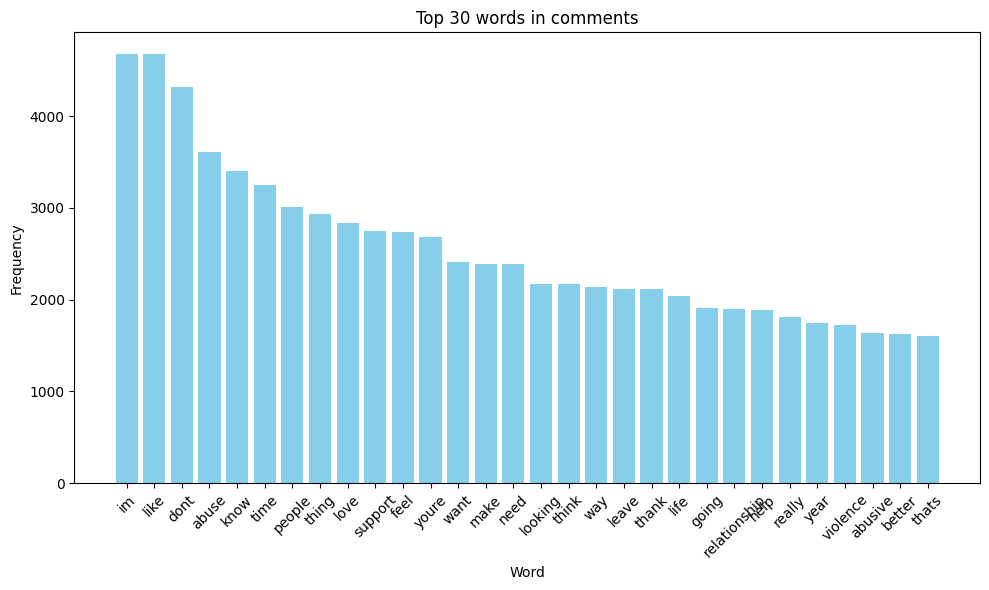

Plot saved as top_words.pdf


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np

def get_top_n_words(n, vectorizer, text):
    # Get word counts
    X = vectorizer.fit_transform(text)
    sum_words = X.sum(axis=0)

    # Create and sort word-frequency pairs
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    # Get top N words and frequencies
    top_words = words_freq[:n]
    words = [word for word, freq in top_words]
    frequencies = [freq for word, freq in top_words]

    # Calculate and print total frequency of top words
    total_freq = sum(frequencies)
    print(f"\nTotal occurrences of top {n} words: {int(total_freq)}")

    # Print each word and its frequency
    print("\nTop words and their frequencies:")
    for word, freq in zip(words, frequencies):
        print(f"{word}: {int(freq)}")

    return words, frequencies

def plot_top_words(words, frequencies, n):
    # Create plot
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(words)), frequencies, color='skyblue')

    # Customize plot
    plt.xticks(range(len(words)), words, rotation=45)
    plt.title(f'Top {n} words in comments')
    plt.xlabel('Word')
    plt.ylabel('Frequency')

    # Adjust layout and save
    plt.tight_layout()
    plt.savefig('top_words.pdf')
    plt.show()
    plt.close()

# Main execution
if __name__ == "__main__":
    # Load and process data
    df = pd.read_csv('abusiverelation_domesticviolence_comments_cleaned_filtered.csv')
    text_data = df['comment_body'].dropna().astype(str).tolist()

    # Get top words
    count_vectorizer = CountVectorizer(stop_words='english')
    words, frequencies = get_top_n_words(30, count_vectorizer, text_data)

    # Create and save plot
    plot_top_words(words, frequencies, 30)
    print("Plot saved as top_words.pdf")


In [ ]:
import pandas as pd

# Read the CSV file
df_cleaned_filtered = pd.read_csv('abusiverelation_domesticviolence_comments_cleaned_filtered.csv')

# Calculate comment lengths (using df_cleaned_filtered, not df_cleaned)
df_cleaned_filtered['comment_length'] = df_cleaned_filtered['comment_body'].fillna('').apply(len)

# Print statistics
print("\nComment Length Statistics:")
print(df_cleaned_filtered['comment_length'].describe())



Comment Length Statistics:
count    15120.000000
mean       245.911045
std        315.810196
min          0.000000
25%         54.000000
50%        133.000000
75%        319.000000
max       4609.000000
Name: comment_length, dtype: float64


In [ ]:
df_cleaned_filtered.head()

,comment_author,comment_body,comment_length
0,Winter_Apartment_376,op nothing lied give slightest reason even fel...,344
1,MBQC95,could written brother year ago thing inevitabl...,161
2,Bossbabe_8,wont say im scared men cause woman abusive lon...,137
3,Beginning-Isopod-472,yes learning make friend though relationship o...,52
4,SockSure7380,yessssssssssss,14


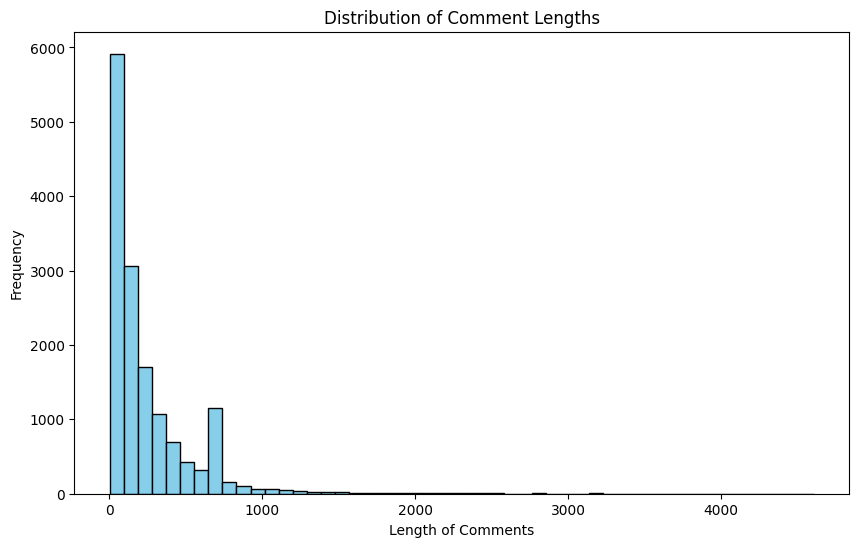


Comment length statistics:
count    14998.000000
mean       247.911388
std        316.309165
min          1.000000
25%         55.000000
50%        135.000000
75%        321.000000
max       4609.000000
Name: comment_length, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df_cleaned_filtered = pd.read_csv('abusiverelation_domesticviolence_comments_cleaned.csv')

# Calculate comment lengths from comment_body column
df_cleaned_filtered['comment_length'] = df_cleaned_filtered['comment_body'].str.len()

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned_filtered['comment_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Comment Lengths')
plt.xlabel('Length of Comments')
plt.ylabel('Frequency')
plt.show()

# Print some basic statistics about comment lengths
print("\nComment length statistics:")
print(df_cleaned_filtered['comment_length'].describe())
comment_hist_fig.savefig("comment_hist_fig.pdf")



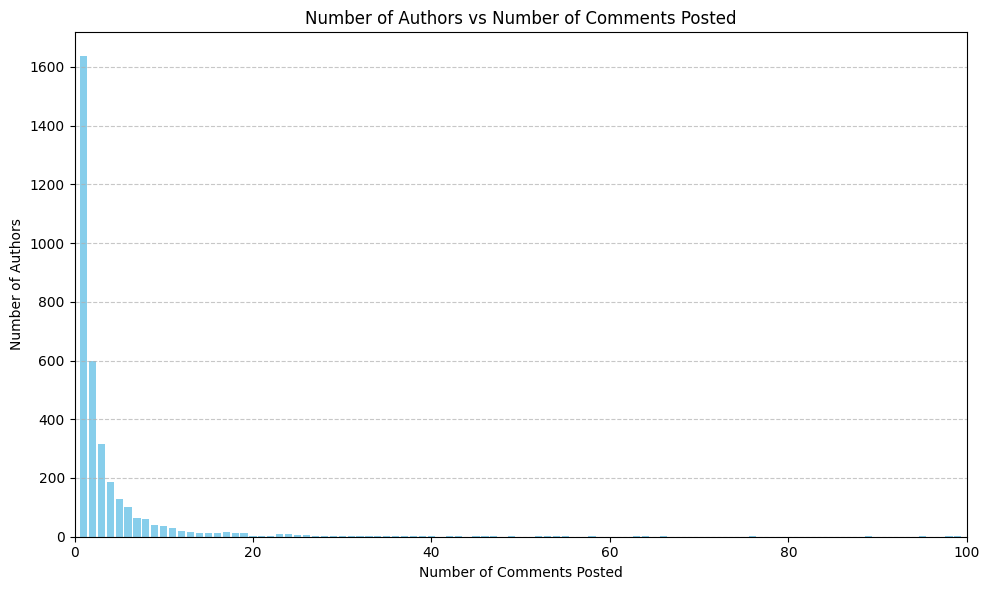

Authors who posted 100 or fewer comments: 59


In [ ]:
# Get comment counts for authors
author_counts = df['comment_author'].value_counts()

# Create frequency distribution using the recommended method
author_frequency = pd.Series(author_counts.values).value_counts().sort_index()

# Filter for range 0-50
author_frequency = author_frequency[author_frequency.index <= 100]

# Create plot
auth_fig = plt.figure(figsize=(10, 6))
plt.bar(author_frequency.index, author_frequency.values, color='skyblue')

# Customize plot
plt.title('Number of Authors vs Number of Comments Posted')
plt.xlabel('Number of Comments Posted')
plt.ylabel('Number of Authors')
plt.xlim(0, 100)  # Set x-axis limit from 0 to 100

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7, axis='y')

# Show and save
plt.tight_layout()
plt.show()
auth_fig.savefig("author_count_fig.pdf")

# Print some statistics
print(f"Authors who posted 100 or fewer comments: {len(author_frequency)}")

In [ ]:
unique_authors_count = df['comment_author'].nunique()

print(f"There are {unique_authors_count} different authors.")

author_comment_dict = df.groupby('comment_author')['comment_body'].apply(list).to_dict()

There are 3404 different authors.


In [ ]:
sorted_author_comments = sorted(author_comment_dict.items(), key=lambda item: len(item[1]), reverse=True)

# Get the first 50 authors
top_50_authors = sorted_author_comments[:50]

for author, comments in top_50_authors:
    print(f"Author: {author}, Comments: {len(comments)}")

Author: AutoModerator, Comments: 955
Author: [deleted], Comments: 521
Author: MissMoxie2004, Comments: 176
Author: Excellent_Valuable92, Comments: 164
Author: Ok_Introduction9466, Comments: 145
Author: Fun_Orange_3232, Comments: 138
Author: mysteryfairylove, Comments: 132
Author: Rad_Energetics, Comments: 106
Author: gerMean, Comments: 103
Author: anonykitcat, Comments: 99
Author: bluebloodmoon22, Comments: 99
Author: Kesha_Paul, Comments: 98
Author: Beginning-Isopod-472, Comments: 95
Author: Longjumping_Talk_123, Comments: 89
Author: domesticviolence-ModTeam, Comments: 76
Author: hotdogtuesday1999, Comments: 66
Author: i3ekah2pt0, Comments: 64
Author: chai_tigg, Comments: 63
Author: MissScrappy, Comments: 58
Author: Ebbie45, Comments: 55
Author: JaegerRainbow_2010, Comments: 55
Author: MochSaMhadainn, Comments: 54
Author: Ammonia13, Comments: 53
Author: Winter_Apartment_376, Comments: 52
Author: PsionicOverlord, Comments: 49
Author: Correct-Sprinkles-21, Comments: 47
Author: Substanti

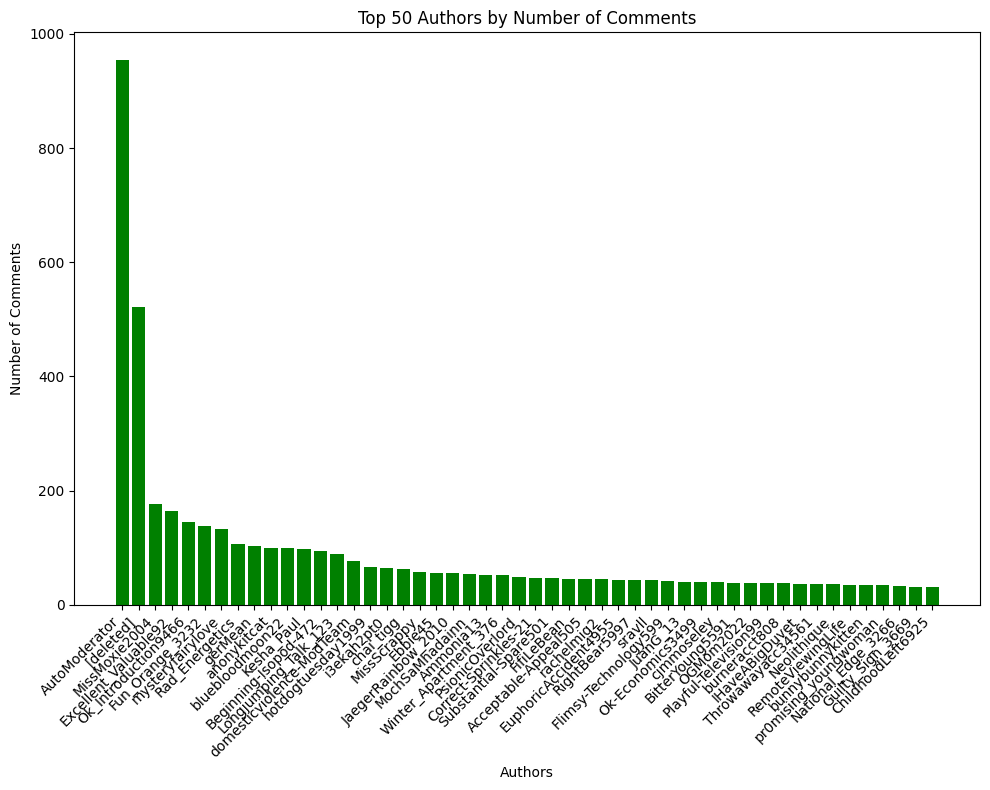

In [ ]:
top_n = 50
top_authors = sorted_author_comments[:top_n]

# Extracting authors and their comment counts
authors = [item[0] for item in top_authors]
comment_counts = [len(item[1]) for item in top_authors]

# Creating the bar chart
auth_vs_comment = plt.figure(figsize=(10, 8))
plt.bar(authors, comment_counts, color='green')
plt.xlabel('Authors')
plt.ylabel('Number of Comments')
plt.title('Top 50 Authors by Number of Comments')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.tight_layout()
plt.show()
auth_vs_comment.savefig("auth_vs_comment.pdf")

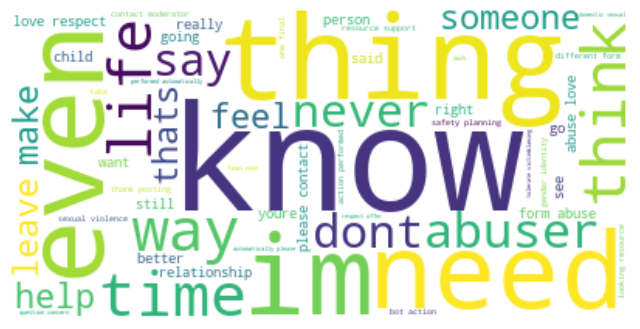

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df = pd.read_csv('abusiverelation_domesticviolence_comments_cleaned.csv')

# Join all the text in the 'body' column
text = " ".join(review for review in df.comment_body if isinstance(review, str))

# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)

# Create a figure to display the word cloud
fig_cloud = plt.figure(figsize=(8, 8))  # Adjust the size as needed
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Save the figure as a PDF
fig_cloud.savefig("fig_wordcloud.pdf")


In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
import nltk

# Download required NLTK data (run once)
nltk.download('punkt')

def analyze_and_tokenize(text):
    """
    Perform VADER sentiment analysis and tokenization on text
    """
    # Check if text is NaN or not a string
    if pd.isna(text) or not isinstance(text, str):
        return {
            'tokens': '',
            'compound_score': 0,
            'positive_score': 0,
            'negative_score': 0,
            'neutral_score': 0,
            'sentiment': 'neutral'
        }

    # Initialize VADER
    analyzer = SentimentIntensityAnalyzer()

    # Get sentiment scores
    scores = analyzer.polarity_scores(text)

    # Tokenize text
    tokens = word_tokenize(text)

    return {
        'tokens': ' | '.join(tokens),
        'compound_score': scores['compound'],
        'positive_score': scores['pos'],
        'negative_score': scores['neg'],
        'neutral_score': scores['neu'],
        'sentiment': 'positive' if scores['compound'] >= 0.05
                    else 'negative' if scores['compound'] <= -0.05
                    else 'neutral'
    }

# Main process
print("Starting analysis...")

# Read cleaned data
df = pd.read_csv('abusiverelation_domesticviolence_comments_cleaned_filtered.csv')

# Remove any NaN values from comment_body
df = df.dropna(subset=['comment_body'])

# Apply analysis to each comment
print("Analyzing comments...")
results = df['comment_body'].apply(analyze_and_tokenize)

# Add results to dataframe
df['tokens'] = results.apply(lambda x: x['tokens'])
df['compound_score'] = results.apply(lambda x: x['compound_score'])
df['positive_score'] = results.apply(lambda x: x['positive_score'])
df['negative_score'] = results.apply(lambda x: x['negative_score'])
df['neutral_score'] = results.apply(lambda x: x['neutral_score'])
df['sentiment'] = results.apply(lambda x: x['sentiment'])

# Save results
print("Saving results...")
df.to_csv('vader_lexicon_analysis.csv', index=False)
print("Analysis complete! Results saved to vader_lexicon_analysis.csv")

# Print summary
total = len(df)
sentiment_counts = df['sentiment'].value_counts()
print("\nSentiment Distribution:")
for sentiment, count in sentiment_counts.items():
    percentage = (count/total) * 100
    print(f"{sentiment}: {count} comments ({percentage:.2f}%)")

[nltk_data] Downloading package punkt to C:\Users\Hp 840
[nltk_data]     g3/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Starting analysis...
Analyzing comments...
Saving results...
Analysis complete! Results saved to vader_lexicon_analysis.csv

Sentiment Distribution:
positive: 7641 comments (50.95%)
negative: 5847 comments (38.99%)
neutral: 1510 comments (10.07%)


In [ ]:
import pandas as pd

# Read the file
print("Reading the file...")
df = pd.read_csv('Final_Data_GPT-Abusive.csv')

# Count yes/no values
label_counts = df['Related'].value_counts()

# Calculate total comments
total_comments = len(df)

# Print results
print("\nGPT Analysis Results:")
print("-" * 40)
print(f"Total Comments Analyzed: {total_comments}")
print("-" * 40)

# Print counts and percentages
for label, count in label_counts.items():
    percentage = (count/total_comments) * 100
    print(f"{label}: {count} comments ({percentage:.2f}%)")

Reading the file...

GPT Analysis Results:
----------------------------------------
Total Comments Analyzed: 13006
----------------------------------------
Yes: 9728 comments (74.80%)
No: 1433 comments (11.02%)


In [ ]:
!pip install gdown


In [ ]:
# Please Run this Cell First
file_id = '1no3ISZHEa7GSLMQ8MwKPCWcIi1XCpTDY'
!gdown --id {file_id} -O Final_Data_GPT-Abusive.csv

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1no3ISZHEa7GSLMQ8MwKPCWcIi1XCpTDY
To: /content/Final_Data_GPT-Abusive.csv
100% 17.1M/17.1M [00:00<00:00, 28.3MB/s]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# 1. Load the data
print("Loading data...")
df = pd.read_csv('Final_Data_GPT-Abusive.csv')

# 2. Remove rows with NaN values
print("Cleaning data...")
df = df.dropna(subset=['comment_body', 'Related'])  # Remove rows with NaN in these columns

# 3. Prepare features (X) and labels (y)
X = df['comment_body']  # Your text column
y = df['Related']    # Your label column

# 4. Split data into training (80%) and testing (20%) sets
print("Splitting data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Convert text to numerical features
print("Converting text to features...")
vectorizer = CountVectorizer(stop_words='english')
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

# 6. Train the Naive Bayes model
print("Training Naive Bayes model...")
model = MultinomialNB()
model.fit(X_train_features, y_train)

# 7. Make predictions
print("Making predictions...")
predictions = model.predict(X_test_features)

# 8. Print results
print("\nModel Performance:")
print("-" * 50)
print(f"Accuracy: {accuracy_score(y_test, predictions):.2f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, predictions))

# 9. Print dataset sizes
print("\nDataset Information:")
print(f"Original dataset size: {len(df)}")
print(f"Training set size: {len(X_train)} comments")
print(f"Testing set size: {len(X_test)} comments")

Loading data...
Cleaning data...
Splitting data into training and testing sets...
Converting text to features...
Training Naive Bayes model...
Making predictions...

Model Performance:
--------------------------------------------------
Accuracy: 0.87

Detailed Classification Report:
              precision    recall  f1-score   support

          No       0.14      0.02      0.04       271
         Yes       0.88      0.98      0.93      1962

    accuracy                           0.87      2233
   macro avg       0.51      0.50      0.48      2233
weighted avg       0.79      0.87      0.82      2233


Dataset Information:
Original dataset size: 11161
Training set size: 8928 comments
Testing set size: 2233 comments


In [ ]:

from sklearn.linear_model import LogisticRegression


# 1. Load and clean data
print("Loading data...")
df = pd.read_csv('Final_Data_GPT-Abusive.csv')
df = df.dropna(subset=['comment_body', 'Related'])  # Remove rows with NaN

# 2. Prepare features (X) and labels (y)
X = df['comment_body']  # Text data
y = df['Related']    # Labels

# 3. Split data 80-20
print("Splitting data...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Convert text to features
print("Converting text to features...")
vectorizer = CountVectorizer(stop_words='english')
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

# 5. Train Logistic Regression model
print("Training Logistic Regression model...")
model = LogisticRegression(max_iter=1000)  # Increased iterations for convergence
model.fit(X_train_features, y_train)

# 6. Make predictions
print("Making predictions...")
predictions = model.predict(X_test_features)

# 7. Print results
print("\nModel Performance:")
print("-" * 50)
print(f"Accuracy: {accuracy_score(y_test, predictions):.2f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, predictions))

# 8. Print dataset sizes
print("\nDataset Information:")
print(f"Total comments processed: {len(df)}")
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Loading data...
Splitting data...
Converting text to features...
Training Logistic Regression model...
Making predictions...

Model Performance:
--------------------------------------------------
Accuracy: 0.85

Detailed Classification Report:
              precision    recall  f1-score   support

          No       0.13      0.04      0.06       271
         Yes       0.88      0.96      0.92      1962

    accuracy                           0.85      2233
   macro avg       0.51      0.50      0.49      2233
weighted avg       0.79      0.85      0.82      2233


Dataset Information:
Total comments processed: 11161
Training set size: 8928
Testing set size: 2233


In [ ]:

from sklearn.svm import LinearSVC

# 1. Load and clean data
print("Loading data...")
df = pd.read_csv('Final_Data_GPT-Abusive.csv')
df = df.dropna(subset=['comment_body', 'Related'])  # Remove rows with NaN

# 2. Prepare features (X) and labels (y)
X = df['comment_body']  # Text data
y = df['Related']    # Labels


# 3. Split data 80-20
print("Splitting data...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Convert text to features
print("Converting text to features...")
vectorizer = CountVectorizer(stop_words='english')
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

# 5. Train SVM model
print("Training SVM model...")
svm_model = LinearSVC(random_state=42, max_iter=110000)
svm_model.fit(X_train_features, y_train)

# 6. Make predictions
print("Making predictions...")
predictions = svm_model.predict(X_test_features)

# 7. Print results
print("\nModel Performance:")
print("-" * 50)
print(f"Accuracy: {accuracy_score(y_test, predictions):.2f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, predictions))

# 8. Print dataset sizes
print("\nDataset Information:")
print(f"Total comments processed: {len(df)}")
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Loading data...
Splitting data...
Converting text to features...
Training SVM model...
Making predictions...

Model Performance:
--------------------------------------------------
Accuracy: 0.79

Detailed Classification Report:
              precision    recall  f1-score   support

          No       0.15      0.15      0.15       271
         Yes       0.88      0.88      0.88      1962

    accuracy                           0.79      2233
   macro avg       0.52      0.52      0.52      2233
weighted avg       0.79      0.79      0.79      2233


Dataset Information:
Total comments processed: 11161
Training set size: 8928
Testing set size: 2233
